In [1]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df_weather = pd.read_csv('weather.csv', index_col='Date', parse_dates=['Date'])
df_weather.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20ed9c3fd0>]], dtype=object)

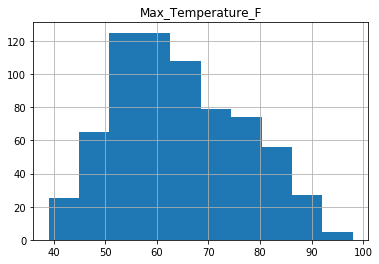

In [6]:
df_weather.hist(column='Max_Temperature_F')

In [5]:
df_trips = pd.read_csv('trip.csv', index_col='trip_id', error_bad_lines=False, parse_dates=['starttime', 'stoptime'])
df_trips.head()

b'Skipping line 50794: expected 12 fields, saw 20\n'


,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
trip_id,,,,,,,,,,,
431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [18]:
import datetime

df_trips['date'] = df_trips['starttime'].apply(lambda x: datetime.date(year=x.year, month=x.month, day=x.day).isoformat())

In [21]:
trips_per_day = df_trips[['date']].groupby(['date']).size().reset_index(name='counts')
trips_per_day = trips_per_day.set_index('date')
trips_per_day.head()

,counts
date,
2014-10-13,818
2014-10-14,982
2014-10-15,626
2014-10-16,790
2014-10-17,588


In [41]:
#df_combined = df_weather[['Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF']].join(trips_per_day)

df_combined = df_weather.join(trips_per_day)

df_combined.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,...,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,counts
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,...,29.65,10,10,4,13,4,21,0.00,Rain,818
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,...,29.54,10,9,3,10,5,17,0.11,Rain,982
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,...,29.51,10,9,3,18,7,25,0.45,Rain,626
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,...,29.81,10,10,10,9,4,-,0.00,Rain,790
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,...,29.73,10,10,6,8,3,-,0.14,Rain,588


In [95]:
df_combined['DayOfWeek'] = df_combined.index.map(lambda x: x.weekday)

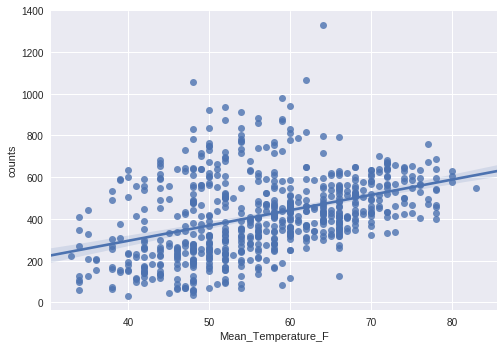

In [40]:
import seaborn as sns

sns.regplot(x="Mean_Temperature_F", y="counts", data=df_combined)

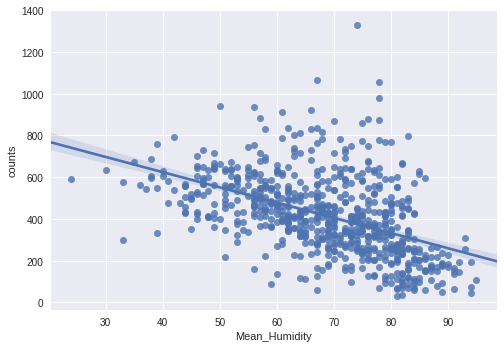

In [42]:
sns.regplot(x="Mean_Humidity", y="counts", data=df_combined)

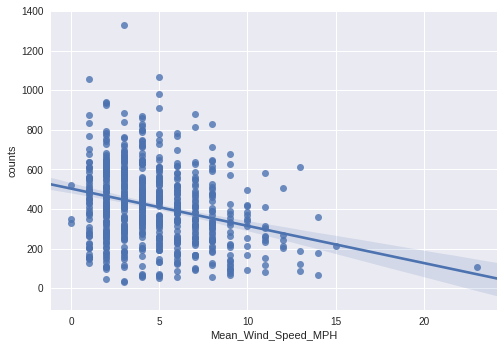

In [45]:
sns.regplot(x="Mean_Wind_Speed_MPH", y="counts", data=df_combined)

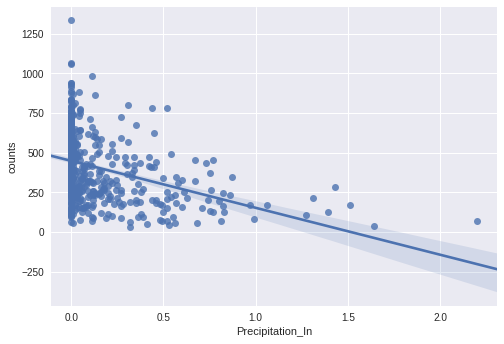

In [125]:
sns.regplot(x="Precipitation_In", y="counts", data=df_combined)

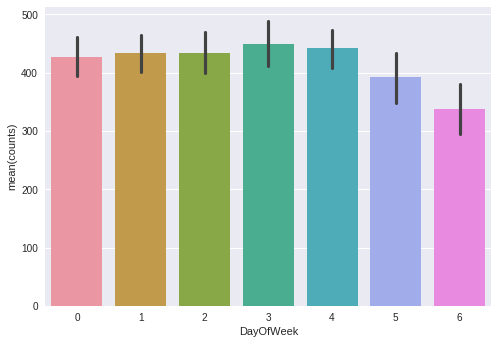

In [96]:
sns.barplot(x="DayOfWeek", y="counts", data=df_combined)

In [120]:
X = df_combined[["Mean_Temperature_F", "Mean_Humidity", "Precipitation_In", "Mean_Wind_Speed_MPH", "DayOfWeek"]]
y = df_combined['counts']

In [121]:
X = X.fillna(X.mean())

In [122]:
from sklearn.preprocessing import RobustScaler
import numpy as np

X = RobustScaler().fit_transform(X)
y = np.log1p(y)

In [123]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=8, min_samples_leaf=4)

In [124]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

results = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=5))
print("Score: %.2f (%.2f)" % (results.mean(), results.std()))

Score: 0.47 (0.06)
